In [1]:
#system libraries
import os
import string
#linear algebra
import numpy as np
import pandas as pd
#plotting
import seaborn as sns
import matplotlib.pyplot as plt
#machine learning and nlp
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import sent_tokenize,word_tokenize, RegexpTokenizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
#performance
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix, roc_auc_score, roc_curve, auc


<h2> Load Data </h2>

In [2]:
df = pd.read_csv("./train2.csv")

In [3]:
df.head(10)

,Unnamed: 0,00,000,10,100,11,12,13,13th,14,...,young,younger,youngest,youth,zane,zero,zizek,zombi,zone,zoom
0,0,0,0,1,0,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,9,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.drop(labels = ["Unnamed: 0"], axis = 1, inplace = True)

In [5]:
df.head(10)

,00,000,10,100,11,12,13,13th,14,15,...,young,younger,youngest,youth,zane,zero,zizek,zombi,zone,zoom
0,0,0,1,0,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<h2> Train-Validation sets </h2>

In [6]:
X = df.drop(labels = ["sentiment"], axis = 1)
y = df['sentiment']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, shuffle = True)

<h2> Train Classifier </h2>
<p> Here, we will be using Multinomial Naive Bayes Classifier for training the data </p>

In [8]:
model = MultinomialNB()

model.fit(X_train, y_train)

MultinomialNB()

<h2> Make predictions on validation set</h2>

In [9]:
predictions = model.predict(X_test)

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      2506
           1       0.86      0.84      0.85      2494

    accuracy                           0.85      5000
   macro avg       0.85      0.85      0.85      5000
weighted avg       0.85      0.85      0.85      5000



In [10]:
print(accuracy_score(y_test, predictions))

0.8494


<h2> Train Model Using Whole data </h2>

In [11]:
model = MultinomialNB()

model.fit(X, y)

MultinomialNB()

<h2> Testing on the whole test dataset </h2>

In [12]:
df_test = pd.read_csv("./test2.csv")
df_test.head(5)

,Unnamed: 0,00,000,10,100,11,12,13,13th,14,...,young,younger,youngest,youth,zane,zero,zizek,zombi,zone,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
df_test.drop(labels = ["Unnamed: 0"], axis = 1, inplace = True)

In [14]:
test_X = df_test.drop(labels = ["sentiment"], axis = 1)
test_y = df_test['sentiment']

In [15]:
test_X.head()

,00,000,10,100,11,12,13,13th,14,15,...,young,younger,youngest,youth,zane,zero,zizek,zombi,zone,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<h2> Model predictions on test set </h2>

In [16]:
predictions = model.predict(test_X)

In [17]:
print(classification_report(test_y, predictions))

              precision    recall  f1-score   support

           0       0.81      0.86      0.84     12500
           1       0.86      0.80      0.83     12500

    accuracy                           0.83     25000
   macro avg       0.83      0.83      0.83     25000
weighted avg       0.83      0.83      0.83     25000



In [18]:
#some helper functions
#confusion matrix plotter
def plot_matrix(y_test,predictions):
    matrix=confusion_matrix(y_test,predictions)
    matrix=matrix.transpose()
    cm_df=pd.DataFrame(matrix,index=["Positive Review","Negative Review"],columns=["Positive Review","Negative Review"])
    sns.heatmap(cm_df,annot_kws={"size":16},annot=True,fmt="d")

#roc curve plotter
def plot_roc(y_test,predictions):
    actual_vals=pd.DataFrame(pd.get_dummies(y_test))
    predictions=pd.DataFrame(pd.get_dummies(predictions))
    print('0: {}'.format(predictions[predictions[0]==1][0].sum()))
    print('1 :{}'.format(predictions[predictions[1]==1][1].sum()))
    predictions.head()
    #compute roc curve and roc area for each curve
    fpr=dict()
    tpr=dict()
    roc_auc=dict()
    n_classes=2

    #loop for each class
    for i in range(n_classes):
        fpr[i],tpr[i],_=roc_curve(actual_vals.iloc[:,i],predictions.iloc[:,i])
        roc_auc[i]=auc(fpr[i],tpr[i])
    #micro-average roc curve
    fpr["micro"],tpr["micro"],_=roc_curve(actual_vals.to_numpy().ravel(),predictions.to_numpy().ravel())
    roc_auc["micro"]=auc(fpr["micro"],tpr["micro"])
    
    colors = [ 'darkorange', 'cornflowerblue']
    #main plotter
    lw=2
    plt.figure(figsize=(10,8))
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=4)
    labels=['Positive Review','Negative Review']
    for i,color in zip(range(n_classes),colors):
         plt.plot(fpr[i], tpr[i], color=color,lw=lw,label='ROC curve of class {0} {name} (area = {area:0.2f})'
                 ''.format(i, name=labels[i],area=roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for IMDB Review classification')
    plt.legend(loc="lower right")
    plt.show()
    


<h2> Confusion Matrix </h2>

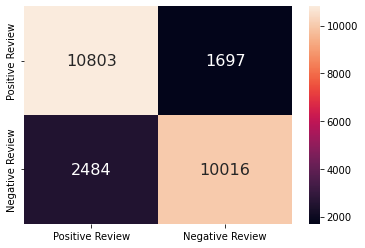

In [19]:
plot_matrix(predictions, test_y)

<h2> ROC Curve </h2>

0: 12500
1 :12500


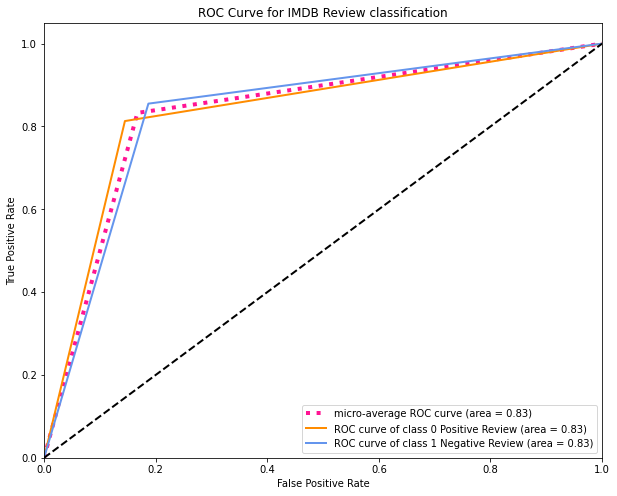

In [20]:
plot_roc(predictions, test_y)

<p>More classifiers to be added soon </p>